In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:19<00:00, 89.4MB/s]
100% 1.06G/1.06G [00:19<00:00, 59.3MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [10]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [12]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[early_stopping, lr_scheduler])

Epoch 1/10
625/625 [==============================] - 320s 496ms/step - loss: 1.2136 - accuracy: 0.5910 - val_loss: 0.6164 - val_accuracy: 0.6432 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 310s 495ms/step - loss: 0.5916 - accuracy: 0.6864 - val_loss: 0.5686 - val_accuracy: 0.7032 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 304s 486ms/step - loss: 0.5352 - accuracy: 0.7310 - val_loss: 0.5048 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 307s 491ms/step - loss: 0.5526 - accuracy: 0.7324 - val_loss: 0.5364 - val_accuracy: 0.7406 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 303s 485ms/step - loss: 0.4875 - accuracy: 0.7689 - val_loss: 0.6895 - val_accuracy: 0.5702 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 303s 484ms/step - loss: 0.4787 - accuracy: 0.7715 - val_loss: 0.4272 - val_accuracy: 0.7990 - lr: 1.0000e-04
Epoch 7/10
625/625 [======================

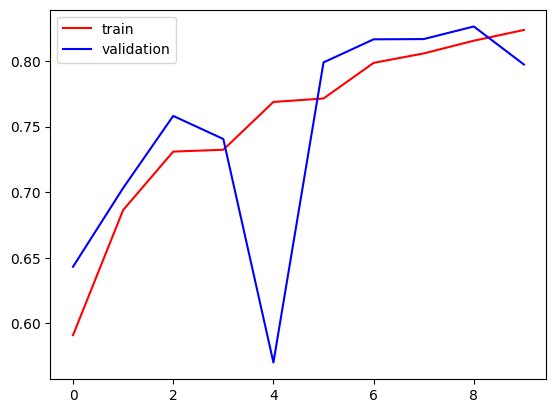

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

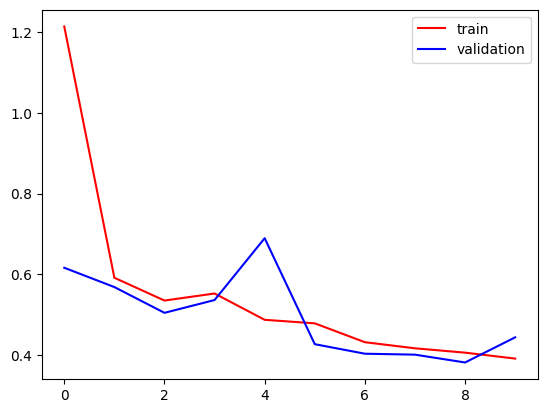

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [18]:
import cv2

In [50]:
test_img = cv2.imread('/content/dog2.jpg')

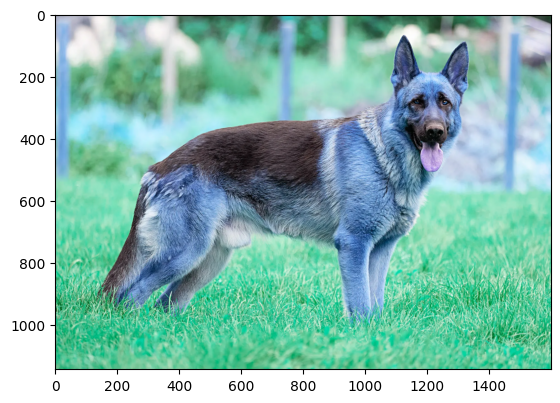

In [51]:
plt.imshow(test_img)

In [52]:
test_img.shape

(1144, 1600, 3)

In [53]:
test_img = cv2.resize(test_img,(256,256))

In [54]:
test_input = test_img.reshape((1,256,256,3))

In [55]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [60]:
from keras.preprocessing import image
import numpy as np
test1_img = image.load_img('/content/dog2.jpg')
test1_img = image.img_to_array(test_img)
test1_img = np.expand_dims(test_img,axis=0)
model.predict(test1_img)

1/1 [==============================] - 0s 51ms/step


array([[0.]], dtype=float32)